CHAPTER 8. PATTERN RECOGNITION

Exercise 1:  Lets say we have trained an ML model and gotten g as out- put, and lets say we want to use the test-set to estimate precision and recall. Lets say you wish to give a guarantee using for instance ”concentration of measure” in the following scenarios
1. The function g is always 1 2. The function g is always 0
3. P(Y =1)iscloseto0
4. P(Y =1) is close to 1.
Which of these problems are easier and which are harder? What if we switch
to estimating precision and recall for class 0?

Switching to class 0 does not change the underlying difficulty pattern but applies it symmetrically to class 0. Scenarios with imbalanced classes (e.g., 
P(Y=1) close to 0 or 1) are inherently easier or harder based on which class is the "positive" class.
Always predicting a single class (e.g., 
g always 1 or 0) simplifies recall estimation but makes precision estimation trivial or undefined.
Concentration of measure arguments (e.g., using the Chernoff bound or Hoeffding's inequality) are more useful for balanced class distributions because rare events lead to higher variability in estimates.
| **Scenario**             | **Precision Difficulty**          | **Recall Difficulty** |  
|---------------------------|------------------------------------|------------------------|  
| \( g \) always 1          | Moderate/Hard (depends on \( P(Y=1) \)) | Easy (always 1)        |  
| \( g \) always 0          | Undefined                         | Easy (always 0)        |  
| \( P(Y=1) \) close to 0   | Hard                              | Hard                   |  
| \( P(Y=1) \) close to 1   | Easy                              | Easy                   |  


Example: Singular Value Decomposition

In [1]:
import numpy as np

# Example matrix
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Perform SVD
U, S, VT = np.linalg.svd(A)

# Print the results
print("Original Matrix A:")
print(A)

print("\nU (Left Singular Vectors):")
print(U)

print("\nS (Singular Values):")
print(S)

print("\nVT (Right Singular Vectors, Transposed):")
print(VT)

# Reconstruct A using U, S, VT
Sigma = np.zeros((A.shape[0], A.shape[1]))
np.fill_diagonal(Sigma, S)
A_reconstructed = np.dot(U, np.dot(Sigma, VT))

print("\nReconstructed Matrix A:")
print(A_reconstructed)

#D = np.diag(D)
#np.linalg.norm(X-U@D@VT)

Original Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

U (Left Singular Vectors):
[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]

S (Singular Values):
[1.68481034e+01 1.06836951e+00 1.47280825e-16]

VT (Right Singular Vectors, Transposed):
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [ 0.40824829 -0.81649658  0.40824829]]

Reconstructed Matrix A:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


Example: Principal Component Analysis

Original Data Shape: (300, 2)


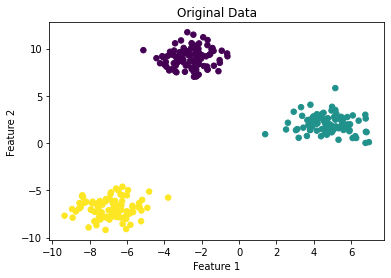

Transformed Data Shape (after PCA): (300, 1)


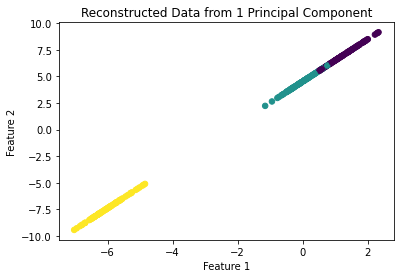

Explained Variance Ratio: [0.74600765]
Total Explained Variance: 0.7460076489554803


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42)
print("Original Data Shape:", X.shape)

# Visualize the original data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 dimension
X_pca = pca.fit_transform(X)

print("Transformed Data Shape (after PCA):", X_pca.shape)

# Transform back to 2D for visualization
X_reconstructed = pca.inverse_transform(X_pca)

# Visualize the transformed data
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y, cmap='viridis', s=30)
plt.title("Reconstructed Data from 1 Principal Component")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", np.sum(pca.explained_variance_ratio_))


# Perceptron Algorithm

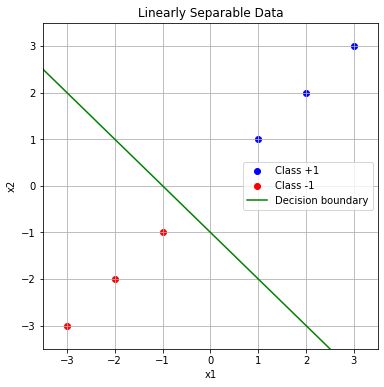

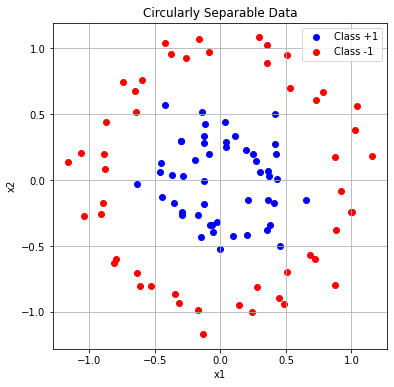

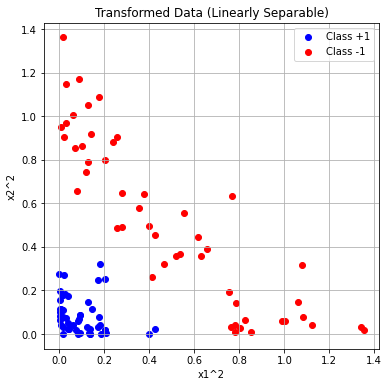

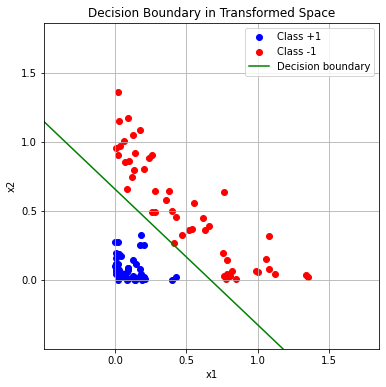

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

def perceptron(X, y, max_iter=1000):
    """
    Perceptron algorithm to find a separating hyperplane.
    X: Features (n_samples, n_features)
    y: Labels (n_samples,) {+1, -1}
    max_iter: Maximum number of iterations
    Returns: weights (w) and bias (b)
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for _ in range(max_iter):
        for i in range(n_samples):
            if y[i] * (np.dot(w, X[i]) + b) <= 0:
                # Update rule
                w += y[i] * X[i]
                b += y[i]
    return w, b

def plot_decision_boundary(X, y, w, b, title):
    """
    Plot the decision boundary and data points.
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
    
    # Decision boundary
    x_min, x_max = np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5
    x_vals = np.linspace(x_min, x_max, 100)
    y_vals = -(w[0] * x_vals + b) / (w[1] + 1e-10)
    plt.plot(x_vals, y_vals, color='green', label='Decision boundary')
    
    plt.xlim(x_min, x_max)
    plt.ylim(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid()
    plt.show()

# 1. Linearly separable data
X1 = np.array([[1, 1], [2, 2], [3, 3], [-1, -1], [-2, -2], [-3, -3]])
y1 = np.array([1, 1, 1, -1, -1, -1])  # Labels for the two classes
w1, b1 = perceptron(X1, y1)
plot_decision_boundary(X1, y1, w1, b1, "Linearly Separable Data")

# 2. Circularly separable data
X2, y2 = make_circles(n_samples=100, factor=0.4, noise=0.1, random_state=42)
y2 = 2 * y2 - 1  # Convert {0, 1} to {-1, +1}

# Plot circularly separable data
plt.figure(figsize=(6, 6))
plt.scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], color='blue', label='Class +1')
plt.scatter(X2[y2 == -1][:, 0], X2[y2 == -1][:, 1], color='red', label='Class -1')
plt.title("Circularly Separable Data")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()

# Transform circular data into a linearly separable space
X2_transformed = np.column_stack((X2[:, 0]**2, X2[:, 1]**2))  # Feature map: (x1, x2) -> (x1^2, x2^2)
w2, b2 = perceptron(X2_transformed, y2)

# Plot transformed data
plt.figure(figsize=(6, 6))
plt.scatter(X2_transformed[y2 == 1][:, 0], X2_transformed[y2 == 1][:, 1], color='blue', label='Class +1')
plt.scatter(X2_transformed[y2 == -1][:, 0], X2_transformed[y2 == -1][:, 1], color='red', label='Class -1')
plt.title("Transformed Data (Linearly Separable)")
plt.xlabel('x1^2')
plt.ylabel('x2^2')
plt.grid()
plt.legend()
plt.show()

# Plot decision boundary for transformed data
plot_decision_boundary(X2_transformed, y2, w2, b2, "Decision Boundary in Transformed Space")


Yes, the process used to transform the circularly separable data into a linearly separable space is conceptually **kernelization**, although implemented explicitly in this case. Here's why:

---

### What Is Kernelization?
Kernelization refers to transforming the data into a higher-dimensional space using a **kernel function**. The idea is that data which is not linearly separable in the original space might become linearly separable in this new, higher-dimensional space.

For example:
- The original circular data was separable in terms of **distance from the origin**, which is a quadratic relationship.
- By explicitly applying the feature map:
  \[
  \phi(x_1, x_2) = (x_1^2, x_2^2)
  \]
  we mapped the data into a new space where the separation becomes linear.

---

### Is This Kernelization?
- **Yes, but explicitly**: Instead of using a kernel function implicitly (as in Support Vector Machines or kernelized algorithms), we manually transformed the data using the feature map \( \phi \). This is the core idea behind kernel methods.
- In typical kernelized algorithms (like SVMs), the kernel trick avoids computing the high-dimensional mapping explicitly. Instead, it computes the inner products in the new space directly:
  \[
  K(x, x') = \langle \phi(x), \phi(x') \rangle
  \]
  For example, the **polynomial kernel** of degree 2 corresponds to this quadratic transformation.




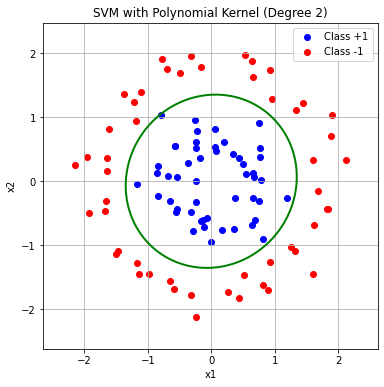

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate circularly separable data
X, y = make_circles(n_samples=100, factor=0.4, noise=0.1, random_state=42)
y = 2 * y - 1  # Convert {0, 1} to {-1, +1}

# Standardize the data (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train an SVM with polynomial kernel (degree 2)
svm = SVC(kernel='poly', degree=2, C=1, random_state=42)
svm.fit(X_scaled, y)

# Plot the circularly separable data
plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], color='blue', label='Class +1')
plt.scatter(X_scaled[y == -1][:, 0], X_scaled[y == -1][:, 1], color='red', label='Class -1')

# Plot decision boundary
x_min, x_max = np.min(X_scaled[:, 0]) - 0.5, np.max(X_scaled[:, 0]) + 0.5
y_min, y_max = np.min(X_scaled[:, 1]) - 0.5, np.max(X_scaled[:, 1]) + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour (decision boundary)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')

plt.title("SVM with Polynomial Kernel (Degree 2)")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid()
plt.show()
